# Dealing with Missing Data

We already reviewed Pandas operations for missing data, now let's apply this to clean a real data file. Keep in mind, there is no 100% correct way of doing this, and this notebook just serves as an example of some reasonable approaches to take on this data.

#### Note: Throughout this section we will be slowly cleaning and adding features to the Ames Housing Dataset for use in the next section. Make sure to always be loading the same file name as in the notebook.

#### 2nd Note: Some of the methods shown here may not lead to optimal performance, but instead are shown to display examples of various methods available.
-----

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
#     print(f.read())

## Data


In [4]:
df = pd.read_csv("../DATA/Ames_outliers_removed.csv")

In [5]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
len(df.columns)

81

In [8]:
df.shape

(2926, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2926 non-null   int64  
 1   MS SubClass      2926 non-null   int64  
 2   MS Zoning        2926 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2926 non-null   int64  
 5   Street           2926 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2926 non-null   object 
 8   Land Contour     2926 non-null   object 
 9   Utilities        2926 non-null   object 
 10  Lot Config       2926 non-null   object 
 11  Land Slope       2926 non-null   object 
 12  Neighborhood     2926 non-null   object 
 13  Condition 1      2926 non-null   object 
 14  Condition 2      2926 non-null   object 
 15  Bldg Type        2926 non-null   object 
 16  House Style      2926 non-null   object 
 17  Overall Qual  

In [9]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Removing the PID

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [10]:
df = df.drop('PID',axis=1)

In [11]:
len(df.columns)

80

In [12]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Observing NaN Features

In [13]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2922,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [15]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      489
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [16]:
100* df.isnull().sum() / len(df)

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.712235
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [18]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [19]:
percent_nan = percent_missing(df)

In [25]:
percent_nan#.head()

Total Bsmt SF      0.034176
Bsmt Unf SF        0.034176
BsmtFin SF 2       0.034176
Electrical         0.034176
BsmtFin SF 1       0.034176
Garage Area        0.034176
Garage Cars        0.034176
Bsmt Full Bath     0.068353
Bsmt Half Bath     0.068353
Mas Vnr Area       0.786056
Bsmt Qual          2.734108
Bsmt Cond          2.734108
BsmtFin Type 1     2.734108
BsmtFin Type 2     2.768284
Bsmt Exposure      2.836637
Garage Type        5.365687
Garage Qual        5.434040
Garage Finish      5.434040
Garage Cond        5.434040
Garage Yr Blt      5.434040
Lot Frontage      16.712235
Fireplace Qu      48.598770
Mas Vnr Type      60.663021
Fence             80.451128
Alley             93.233083
Misc Feature      96.411483
Pool QC           99.589884
dtype: float64

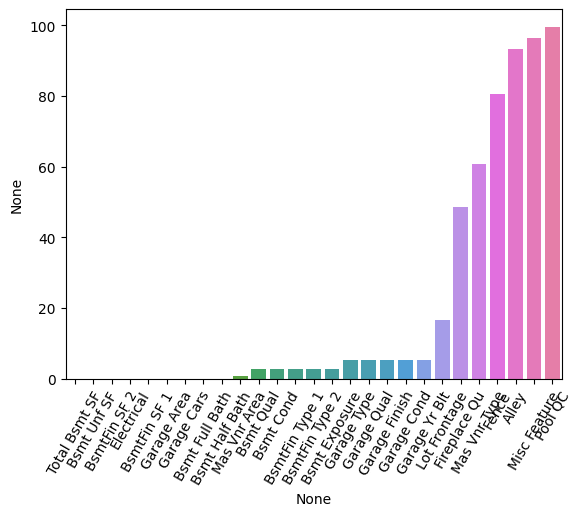

In [24]:
sns.barplot(x=percent_nan.index,y=percent_nan,hue=percent_nan.index)
plt.xticks(rotation=60);

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category. 

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!

## Working based on Rows Missing Data

## Filling in Data or Dropping Data?

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

## Example of Filling in Data : Basement Columns

(0.0, 1.0)

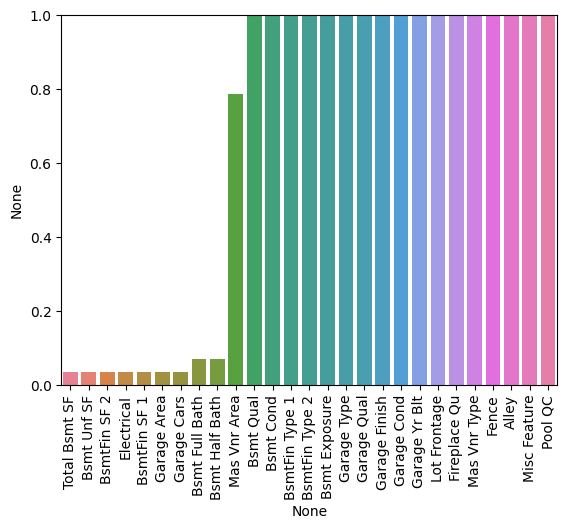

In [26]:
sns.barplot(x=percent_nan.index,y=percent_nan,hue=percent_nan.index)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

Let's drop or fill the rows based on this data. You could either manually fill in the data (especially the Basement data based on the description text file) OR you could simply drop the row and not consider it. Watch the video for a full explanation of this, in reality it probably makes more sense to fill in the Missing Basement data since its well described in the text description.

In [27]:
# Could also imply we should ex
percent_nan[percent_nan < 1]

Total Bsmt SF     0.034176
Bsmt Unf SF       0.034176
BsmtFin SF 2      0.034176
Electrical        0.034176
BsmtFin SF 1      0.034176
Garage Area       0.034176
Garage Cars       0.034176
Bsmt Full Bath    0.068353
Bsmt Half Bath    0.068353
Mas Vnr Area      0.786056
dtype: float64

In [29]:
100/len(df)

0.03417634996582365

In [34]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [35]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1496,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

In [36]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [37]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [38]:
percent_nan = percent_missing(df)

In [40]:
percent_nan

Electrical        0.034176
Garage Cars       0.034176
Garage Area       0.034176
Mas Vnr Area      0.786056
Garage Type       5.365687
Garage Finish     5.434040
Garage Qual       5.434040
Garage Yr Blt     5.434040
Garage Cond       5.434040
Lot Frontage     16.712235
Fireplace Qu     48.598770
Mas Vnr Type     60.663021
Fence            80.451128
Alley            93.233083
Misc Feature     96.411483
Pool QC          99.589884
dtype: float64

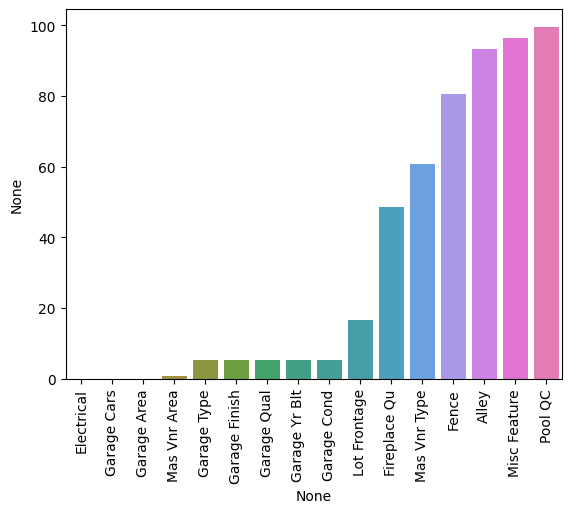

In [41]:
sns.barplot(x=percent_nan.index,y=percent_nan,hue=percent_nan.index)
plt.xticks(rotation=90);

## Dropping Rows

A few of these features appear that it is just one or two rows missing the data. Based on our description .txt file of the dataset, we could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [42]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [43]:
percent_nan = percent_missing(df)

In [46]:
percent_nan

Mas Vnr Area      0.786594
Garage Type       5.369357
Garage Yr Blt     5.403557
Garage Finish     5.403557
Garage Cond       5.403557
Garage Qual       5.403557
Lot Frontage     16.723666
Fireplace Qu     48.563611
Mas Vnr Type     60.636115
Fence            80.471956
Alley            93.228454
Misc Feature     96.409029
Pool QC          99.589603
dtype: float64

(0.0, 1.0)

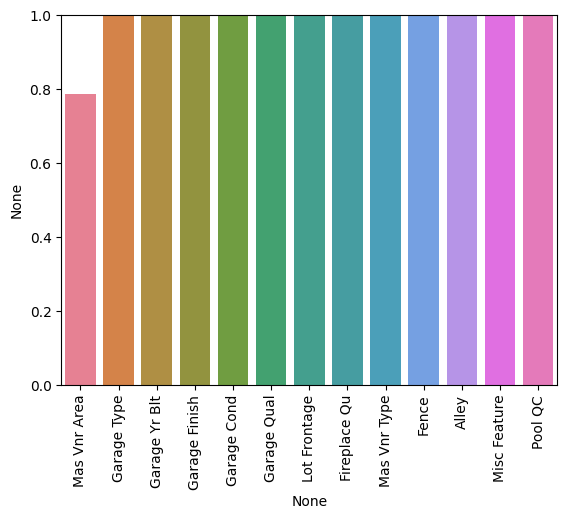

In [47]:
sns.barplot(x=percent_nan.index,y=percent_nan,hue=percent_nan.index)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Mas Vnr Feature 

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [48]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [49]:
percent_nan = percent_missing(df)

In [50]:
percent_nan

Garage Type       5.369357
Garage Qual       5.403557
Garage Finish     5.403557
Garage Yr Blt     5.403557
Garage Cond       5.403557
Lot Frontage     16.723666
Fireplace Qu     48.563611
Fence            80.471956
Alley            93.228454
Misc Feature     96.409029
Pool QC          99.589603
dtype: float64

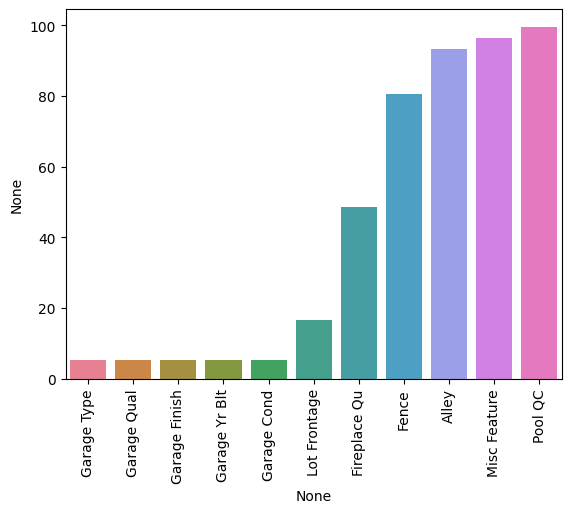

In [51]:
sns.barplot(x=percent_nan.index,y=percent_nan,hue=percent_nan.index)
plt.xticks(rotation=90);

# Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

### Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [52]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2921,Detchd,Unf,TA,TA
2922,Attchd,Unf,TA,TA
2923,NaN,NaN,NaN,NaN
2924,Attchd,RFn,TA,TA


In [53]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [54]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [55]:
percent_nan = percent_missing(df)

In [56]:
percent_nan

Lot Frontage    16.723666
Fireplace Qu    48.563611
Fence           80.471956
Alley           93.228454
Misc Feature    96.409029
Pool QC         99.589603
dtype: float64

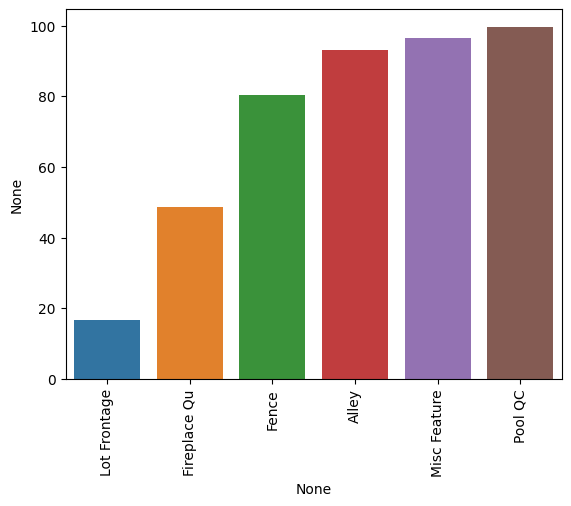

In [57]:
sns.barplot(x=percent_nan.index,y=percent_nan,hue=percent_nan.index)
plt.xticks(rotation=90);


## Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [58]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [59]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2921,37.0,NaN,GdPrv,NaN,NaN,NaN
2922,NaN,NaN,MnPrv,NaN,NaN,NaN
2923,62.0,NaN,MnPrv,NaN,Shed,NaN
2924,77.0,TA,NaN,NaN,NaN,NaN


In [60]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [61]:
percent_nan = percent_missing(df)

In [62]:
percent_nan

Lot Frontage    16.723666
Fireplace Qu    48.563611
dtype: float64

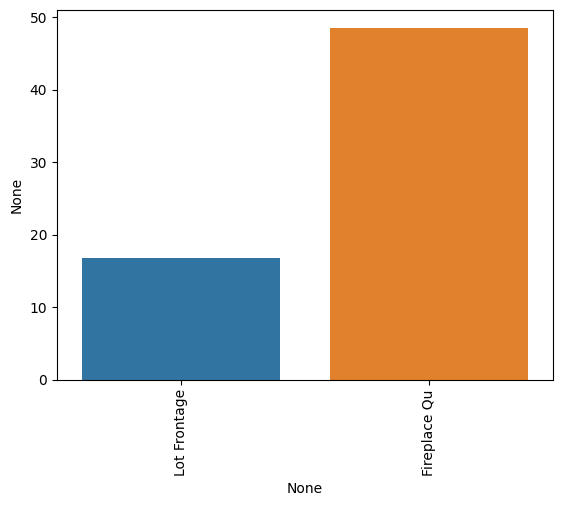

In [63]:
sns.barplot(x=percent_nan.index,y=percent_nan,hue=percent_nan.index)
plt.xticks(rotation=90);

### Filling in Fireplace Quality based on Description Text

In [64]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [65]:
percent_nan = percent_missing(df)

In [66]:
percent_nan

Lot Frontage    16.723666
dtype: float64

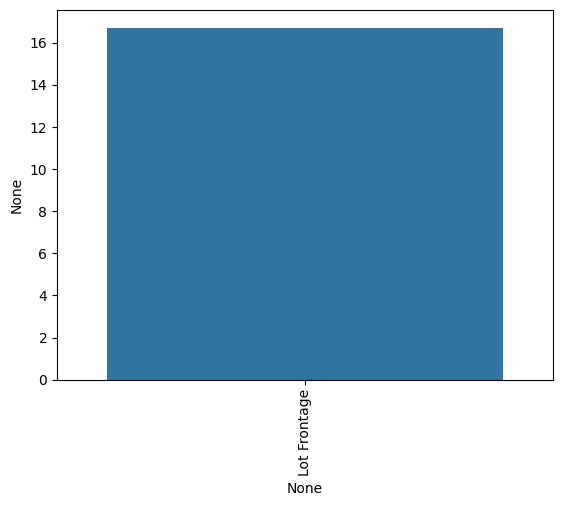

In [67]:
sns.barplot(x=percent_nan.index,y=percent_nan,hue=percent_nan.index)
plt.xticks(rotation=90);

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [68]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

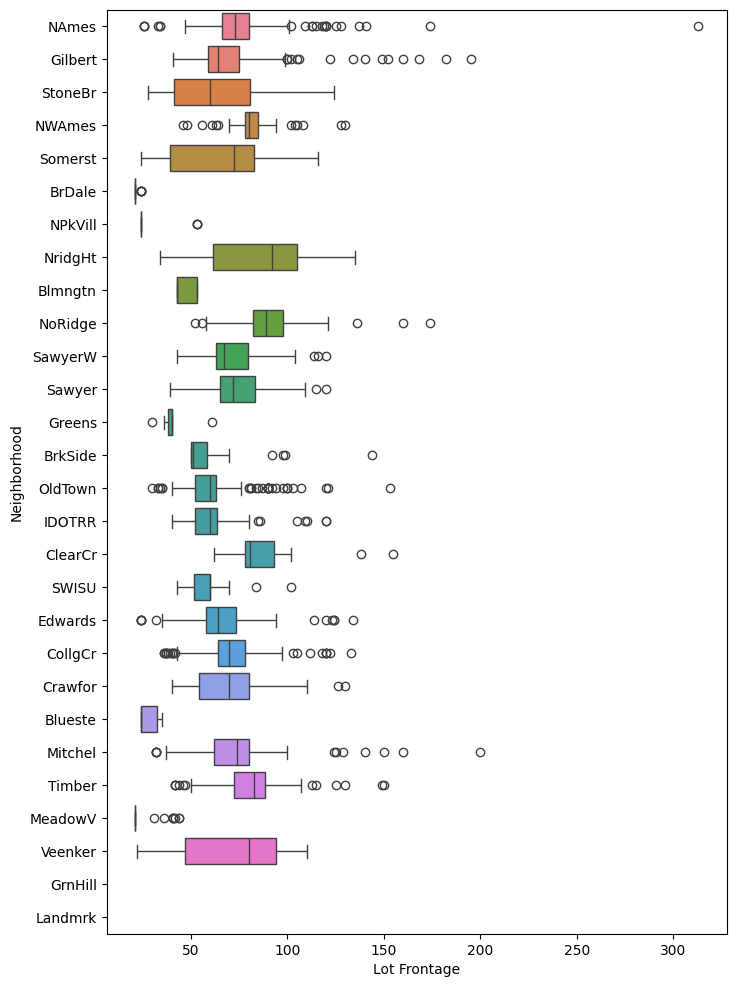

In [69]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h',hue='Neighborhood')

## Impute Missing Data based on other Features

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [70]:
df.groupby('Neighborhood')['Lot Frontage']

In [71]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

## Transform Column

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [72]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [73]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2893,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2894,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2908,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [74]:
df.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

In [75]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2921     37.000000
2922     75.144444
2923     62.000000
2924     77.000000
2925     74.000000
Name: Lot Frontage, Length: 2924, dtype: float64

In [76]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [77]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [78]:
percent_nan = percent_missing(df)

In [79]:
percent_nan

Lot Frontage    0.102599
dtype: float64

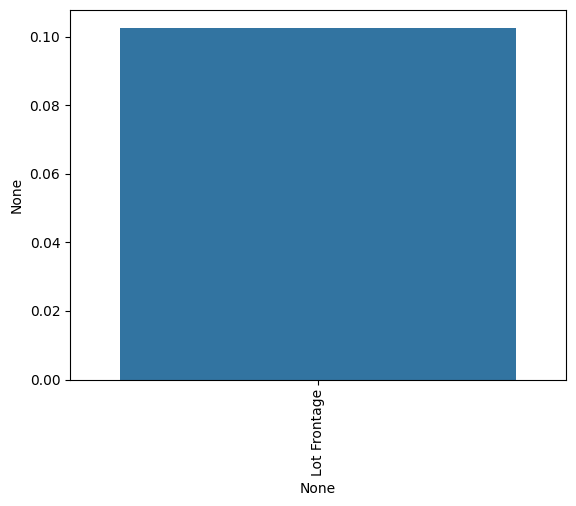

In [80]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [81]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [82]:
percent_nan = percent_missing(df)

In [83]:
percent_nan

Series([], dtype: float64)

Great! We no longer have any missing data in our entire data set! Keep in mind, we should eventually turn all these transformations into an easy to use function. For now, lets' save this dataset:

In [84]:
df.to_csv("../DATA/Ames_NO_Missing_Data.csv",index=False)

----